In [1]:
import pandas as pd

# Make sure the CSV is in the same folder as this script
df = pd.read_csv("mental_health_survey.csv")

print(df.head())


   Age  Gender Family_History Work_Interfere Benefits Care_Options Anonymity  \
0   25    Male            Yes          Often      Yes          Yes       Yes   
1   30  Female             No         Rarely       No           No        No   
2   22    Male            Yes          Never      Yes           No       Yes   
3   28   Other             No      Sometimes      Yes          Yes        No   
4   32    Male            Yes          Often       No          Yes        No   

    Leave Mental_Health_Consequence Phys_Health_Consequence Treatment  
0    Some                       Yes                      No       Yes  
1  Rarely                        No                      No        No  
2    Some                       Yes                     Yes       Yes  
3   Never                     Maybe                   Maybe        No  
4    Some                       Yes                     Yes       Yes  


# Step 1: Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv ("mental_health_survey.csv")
df.head(5)

,Age,Gender,Family_History,Work_Interfere,Benefits,Care_Options,Anonymity,Leave,Mental_Health_Consequence,Phys_Health_Consequence,Treatment
0,25,Male,Yes,Often,Yes,Yes,Yes,Some,Yes,No,Yes
1,30,Female,No,Rarely,No,No,No,Rarely,No,No,No
2,22,Male,Yes,Never,Yes,No,Yes,Some,Yes,Yes,Yes
3,28,Other,No,Sometimes,Yes,Yes,No,Never,Maybe,Maybe,No
4,32,Male,Yes,Often,No,Yes,No,Some,Yes,Yes,Yes


In [4]:
df.shape

(20, 11)

In [5]:
# Data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        20 non-null     int64 
 1   Gender                     20 non-null     object
 2   Family_History             20 non-null     object
 3   Work_Interfere             20 non-null     object
 4   Benefits                   20 non-null     object
 5   Care_Options               20 non-null     object
 6   Anonymity                  20 non-null     object
 7   Leave                      20 non-null     object
 8   Mental_Health_Consequence  20 non-null     object
 9   Phys_Health_Consequence    20 non-null     object
 10  Treatment                  20 non-null     object
dtypes: int64(1), object(10)
memory usage: 1.8+ KB


In [6]:
# Summary of numerical columns
df.describe()

,Age
count,20.000000
mean,29.850000
std,5.640782
min,21.000000
25%,25.750000
50%,29.500000
75%,34.250000
max,40.000000


In [7]:
# Unique vales in each column
df.nunique()

Age                          19
Gender                        3
Family_History                2
Work_Interfere                4
Benefits                      2
Care_Options                  2
Anonymity                     2
Leave                         3
Mental_Health_Consequence     3
Phys_Health_Consequence       3
Treatment                     2
dtype: int64

In [8]:
# Check for Missing Values:
df.isnull().sum()

Age                          0
Gender                       0
Family_History               0
Work_Interfere               0
Benefits                     0
Care_Options                 0
Anonymity                    0
Leave                        0
Mental_Health_Consequence    0
Phys_Health_Consequence      0
Treatment                    0
dtype: int64

In [9]:
df['Treatment'].value_counts()


Treatment
Yes    12
No      8
Name: count, dtype: int64

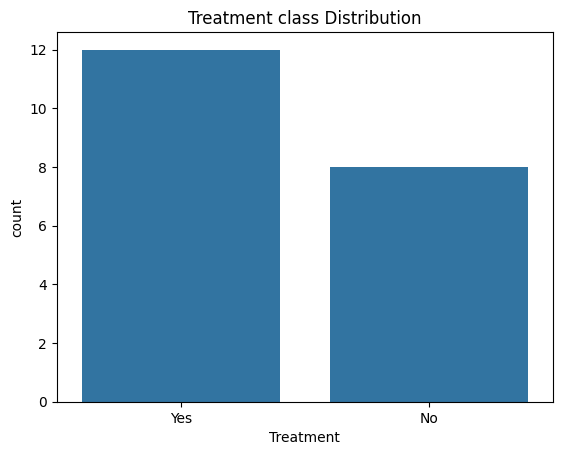

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Treatment", data=df) #data=df → Tells Seaborn: “Use the dataset stored in the variable df (which is your DataFrame)”
plt.title("Treatment class Distribution")
plt.show()

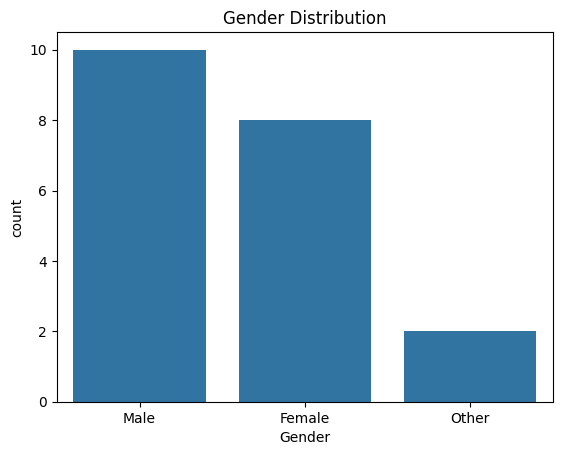

In [11]:
# Gender Distribution:

sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

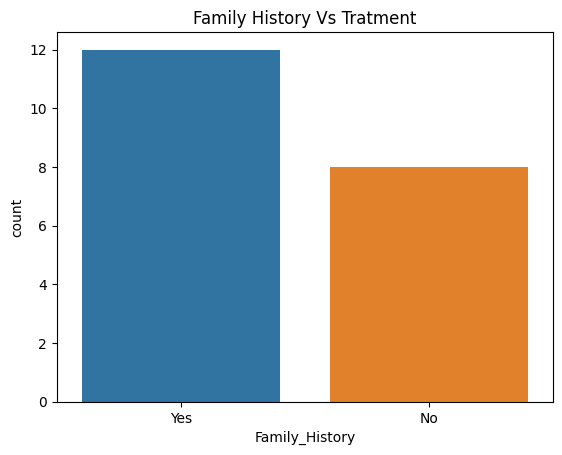

In [12]:
#Family History vs Treatment:
sns.countplot(x='Family_History',hue='Treatment',data=df)
plt.title("Family History Vs Tratment")
plt.show()

#  Step 2: Data Preprocessing (Cleaning & Encoding)

In [13]:
# Check for missing values

df.isnull().sum()

Age                          0
Gender                       0
Family_History               0
Work_Interfere               0
Benefits                     0
Care_Options                 0
Anonymity                    0
Leave                        0
Mental_Health_Consequence    0
Phys_Health_Consequence      0
Treatment                    0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [15]:
df.head(5)

,Age,Gender,Family_History,Work_Interfere,Benefits,Care_Options,Anonymity,Leave,Mental_Health_Consequence,Phys_Health_Consequence,Treatment
0,25,1,1,1,1,1,1,2,2,1,1
1,30,0,0,2,0,0,0,1,1,1,0
2,22,1,1,0,1,0,1,2,2,2,1
3,28,2,0,3,1,1,0,0,0,0,0
4,32,1,1,1,0,1,0,2,2,2,1


# Split the Data & Train the Model

In [21]:
# Define x and y
 
X = df.drop("Treatment",axis=1) # axis=0 → rows
                                #axis=1 → columns
y = df["Treatment"]

In [26]:
# Train - Test split
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2, random_state=42)

In [27]:
# Choose a model
#Let’s start with a Random Forest Classifier — 
#it’s powerful and works well even on small datasets:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train , y_train)

RandomForestClassifier()

In [28]:
# Predict & Evaluate

from sklearn.metrics import accuracy_score , classification_report

y_pred = model.predict(X_test)

In [33]:
print("Accuarcy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Accuarcy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



#  Step 4: Train the Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

#Create the model
model = RandomForestClassifier()

#Train the model
model.fit(X_train , y_train)

RandomForestClassifier()

#  Step 5: Make Predictions

In [35]:
y_pred = model.predict(X_test)

#  Step 6: Check Accuracy

In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test , y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


# 1. See Where It’s Performing Well (Classification Report)



In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



# 2. Visualize Confusion Matrix

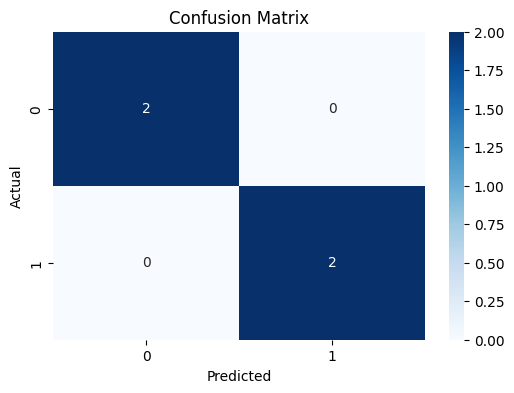

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#  3. Check Feature Importance (Which columns influenced the prediction most)

In [39]:
importances = model.feature_importances_
feature_names = X_train.columns

# Show top important features
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


Age: 0.0210
Gender: 0.0950
Family_History: 0.3471
Work_Interfere: 0.0657
Benefits: 0.0211
Care_Options: 0.0769
Anonymity: 0.0170
Leave: 0.1503
Mental_Health_Consequence: 0.0992
Phys_Health_Consequence: 0.1067


# Saveing the file 

In [40]:
import joblib


In [43]:
# Save Your Trained Model
joblib.dump(model , 'model.pkl')
# This will create a file called model.pkl in your working directory.

['model.pkl']

In [44]:
# Confirm It’s Saved
import os
print(os.path.exists('model.pkl'))  # Should return True


True


In [ ]:
# How to load the file Model in Flask


# model = joblib.load('model.pkl')
